This model classify the **fetal helth into three category 1.Normal 2.Suspect 3.Pathological** to prevent child and maternal mortality.

In [ ]:
# importing libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns

### **Building Support vector Machine with linear kernel for multiclass classification**

In [ ]:
dataset = pd.read_csv('/content/fetal_health.csv')
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
dataset.shape

(2126, 22)

In [ ]:
dataset.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
dataset.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

### **Gathering data**

In [ ]:
#Gathering the dataset

X = dataset.iloc[:,[0,20]].values
y= dataset.iloc[:,21].values

### **Data Preprocessing**

In [ ]:
#Spliting the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train.shape , X_test.shape,y_train.shape,y_test.shape

((1594, 2), (532, 2), (1594,), (532,))

### **Feture Engineering**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Algorithm Selection(SVM) and Training**

In [ ]:
# import svc
from sklearn.svm import SVC

# Creating a instance
classifier = SVC(kernel = 'linear', random_state=None)


# Fitting the model
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
classifier.support_vectors_

array([[-1.48592763,  1.09997033],
       [ 2.14859832,  1.09997033],
       [-1.90130202, -0.52200257],
       ...,
       [-0.96670964, -0.52200257],
       [ 1.73322393, -0.52200257],
       [-0.44749164, -0.52200257]])

### **Making Prediction**

In [ ]:
#predicting the value
y_pred_test = classifier.predict(X_test)
y_pred_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
y_pred_train= classifier.predict(X_train)
y_pred_train

array([1., 1., 1., ..., 1., 1., 1.])

### **Model Evaluation and result**

In [ ]:
from sklearn.metrics import confusion_matrix
train_matrix=confusion_matrix(y_train,y_pred_train)
test_matrix = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix of Training dataset:\n',train_matrix )
print('Confusion Matrix Of Testing dataset:\n',test_matrix)

Confusion Matrix of Training dataset:
 [[1246    0    0]
 [ 213    0    0]
 [ 135    0    0]]
Confusion Matrix Of Testing dataset:
 [[409   0   0]
 [ 82   0   0]
 [ 41   0   0]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Training accuracy :',accuracy_train)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Testing accuracy :',accuracy_test)

Training accuracy : 0.7816813048933501
Testing accuracy : 0.768796992481203


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_pred_test))

Classification Report
              precision    recall  f1-score   support

         1.0       0.77      1.00      0.87       409
         2.0       0.00      0.00      0.00        82
         3.0       0.00      0.00      0.00        41

    accuracy                           0.77       532
   macro avg       0.26      0.33      0.29       532
weighted avg       0.59      0.77      0.67       532



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Data Visulization**

In [ ]:
c = dataset.corr()
print(c)

                                                    baseline value  ...  fetal_health
baseline value                                            1.000000  ...      0.148151
accelerations                                            -0.080560  ...     -0.364066
fetal_movement                                           -0.033436  ...      0.088010
uterine_contractions                                     -0.146373  ...     -0.204894
light_decelerations                                      -0.159032  ...      0.058870
severe_decelerations                                     -0.053518  ...      0.131934
prolongued_decelerations                                 -0.104597  ...      0.484859
abnormal_short_term_variability                           0.305570  ...      0.471191
mean_value_of_short_term_variability                     -0.279607  ...     -0.103382
percentage_of_time_with_abnormal_long_term_vari...        0.285630  ...      0.426146
mean_value_of_long_term_variability                   

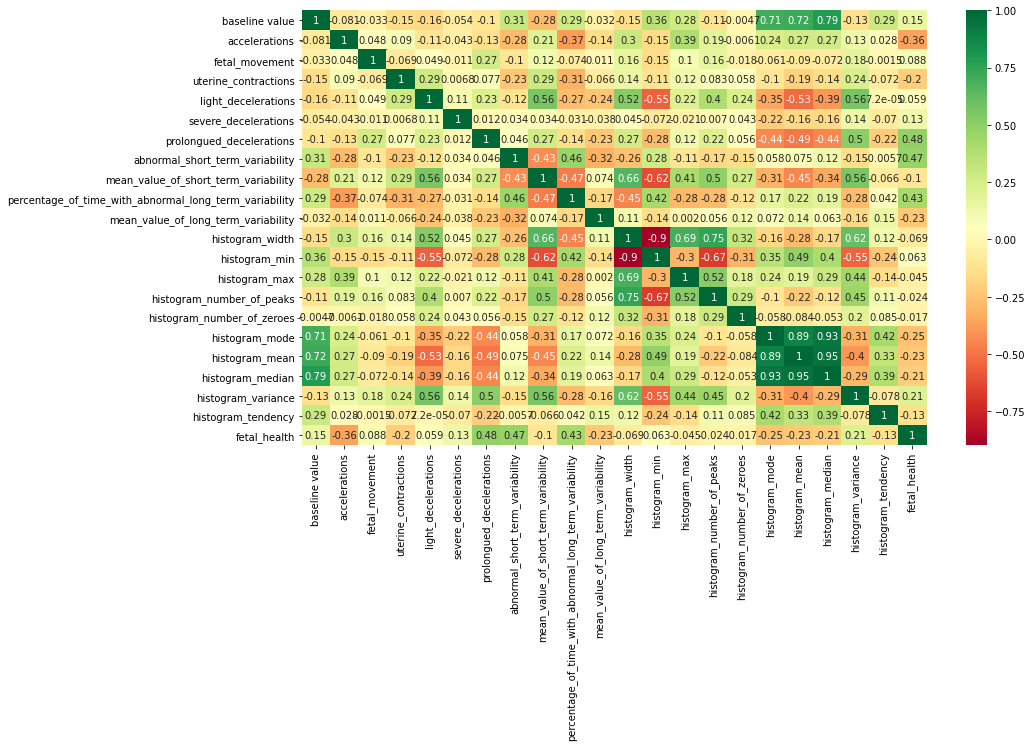

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (14,8))
sns.heatmap(c, annot = True,cmap = "RdYlGn")

In [ ]:
dataset.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


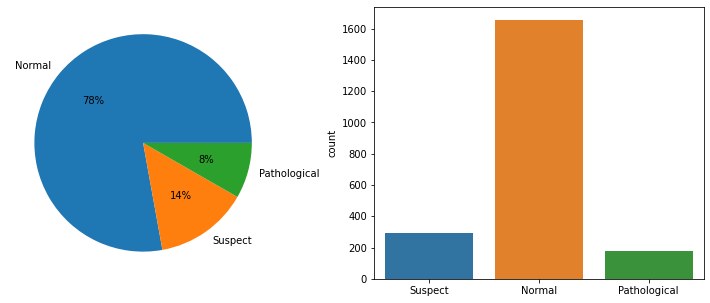

In [ ]:
# fetal health classification bar graph of 1.Normal , 2. Suspect, 3.pethological
a, b, c = dataset['fetal_health'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b, c], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
print(dataset["fetal_health"].value_counts())
Status = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
fetal = [Status[i] for i in dataset["fetal_health"]]
plt.subplot(122)
sns.countplot(fetal)

Text(0.5, 1.0, 'accelerations of each status health')

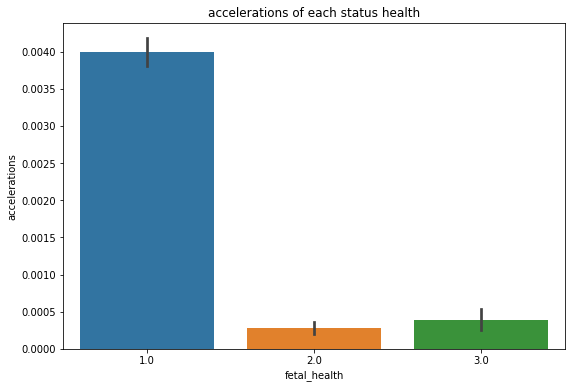

In [ ]:
#Fetal_health according acceleration
plt.figure(figsize = (9,6))
fetal = dataset['fetal_health']
sns.barplot(x = fetal, y= 'accelerations', data = dataset )
plt.title("accelerations of each status health")

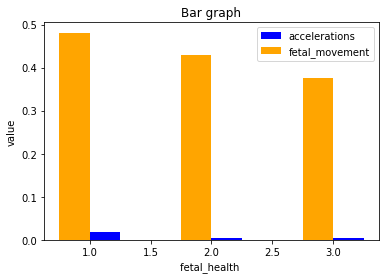

In [ ]:
#fetal health acording to accelerations and fetal_movement
health = dataset.fetal_health
accelerations= dataset.accelerations
movement = dataset.fetal_movement
 
plt.bar(health ,accelerations,color = 'b' ,width=0.25, label = 'accelerations', align='edge')
plt.bar(health - 0.25,movement,color = 'orange' ,width=0.25, label = 'fetal_movement', align='edge')
plt.title('Bar graph')
plt.xlabel('fetal_health ')
plt.ylabel('value')
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c4195b190>,
      dtype=object)

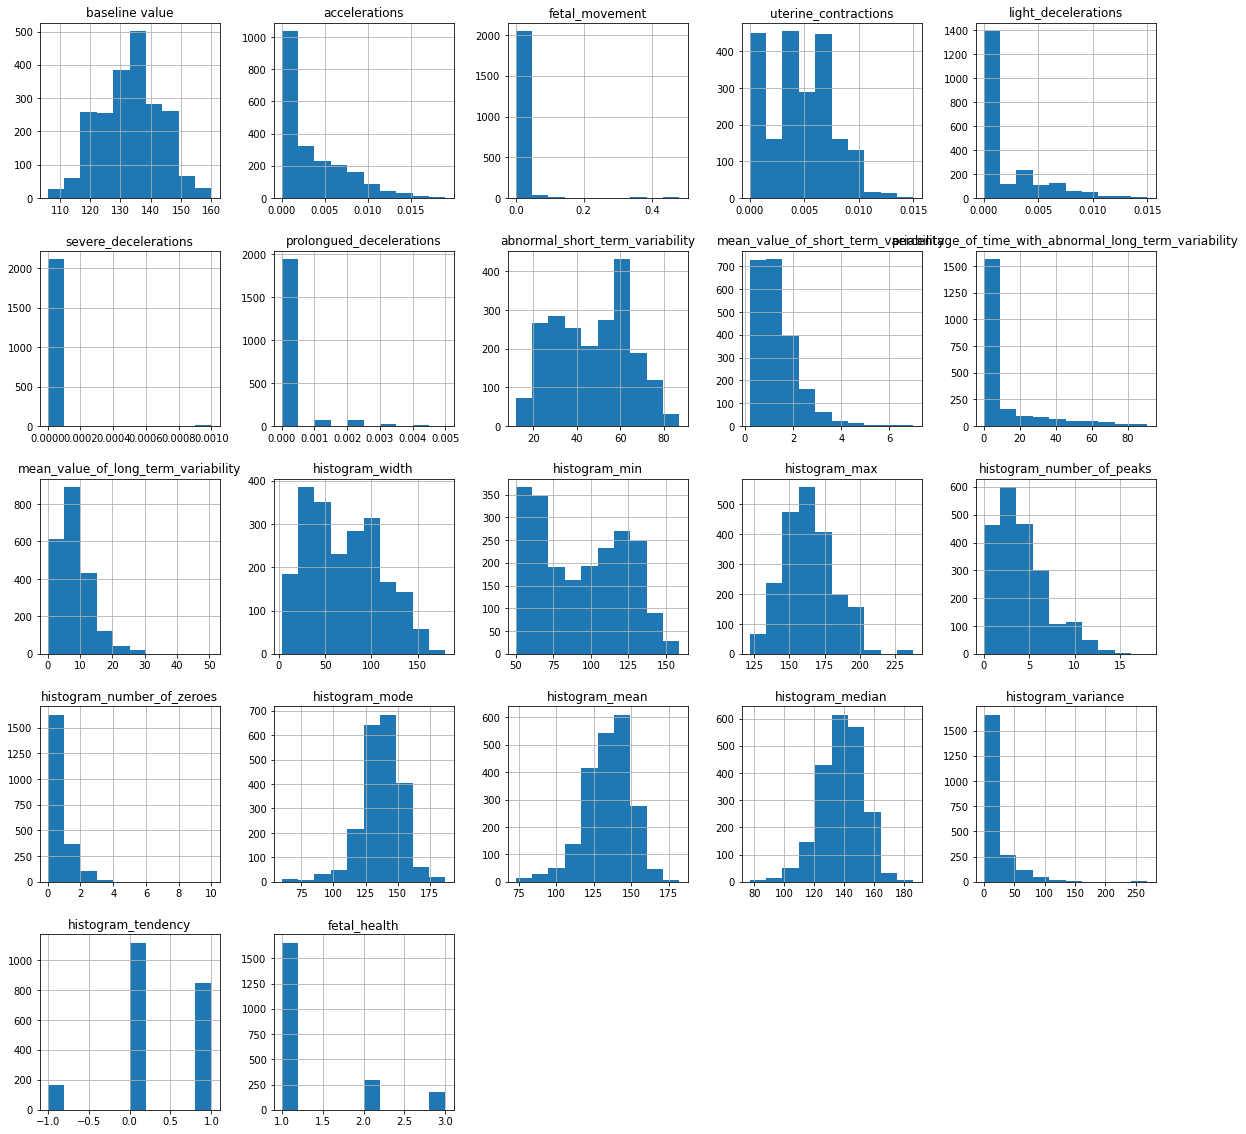

In [ ]:
dataset.hist(figsize=(20,20))